# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Цель проекта  
Найти интересные особенности и зависимости, которые существуют на рынке недвижимости Санкт-Петербурга и Ленинградской области.  

Описание данных

Датасет представляет из себя таблицу со следующими столбцами:  
airports_nearest — расстояние до ближайшего аэропорта в метрах (м)  
balcony — число балконов  
ceiling_height — высота потолков (м)  
cityCenters_nearest — расстояние до центра города (м)  
days_exposition — сколько дней было размещено объявление (от публикации до снятия)  
first_day_exposition — дата публикации  
floor — этаж  
floors_total — всего этажей в доме
is_apartment — апартаменты (булев тип)  
kitchen_area — площадь кухни в квадратных метрах (м²)  
last_price — цена на момент снятия с публикации  
living_area — жилая площадь в квадратных метрах (м²)  
locality_name — название населённого пункта  
open_plan — свободная планировка (булев тип)  
parks_around3000 — число парков в радиусе 3 км  
parks_nearest — расстояние до ближайшего парка (м)  
ponds_around3000 — число водоёмов в радиусе 3 км  
ponds_nearest — расстояние до ближайшего водоёма (м)  
rooms — число комнат  
studio — квартира-студия (булев тип)  
total_area — общая площадь квартиры в квадратных метрах (м²)  
total_images — число фотографий квартиры в объявлении    





<b>План работы</b>

Шаг 1. Открыть файл с данными и изучить общую информацию

Шаг 2. Выполнть предобработку данных

 определить пропущенные значения и заполненить там, где это возможно
 измененить типы данных
 устранить неявные дубликаты, редкие и выбивающиеся значения (аномалии) во всех столбцах

Шаг 3. Добавить в таблицу новые столбцы  
 цена одного квадратного метра  
 день, месяц и год публикации объявления  
 тип этажа квартиры (значения — «первый», «последний», «другой»)  
 расстояние в км до центра города  
 
Шаг 4. Провести исследовательский анализ данных
 изучить и описаны следующие параметры:
  - общая площадь;
  - жилая площадь;
  - площадь кухни;
  - цена объекта;
  - количество комнат;
  - высота потолков;
  - этаж квартиры;
  - тип этажа квартиры («первый», «последний», «другой»);
  - общее количество этажей в доме;
  - расстояние до центра города в метрах;
  - расстояние до ближайшего аэропорта;
  - расстояние до ближайшего парка;
  - день и месяц публикации объявления
 Изучить, как быстро продавались квартиры (столбец days_exposition) и описать, сколько обычно занимает продажа, пояснить какие продажи можно считать быстрыми, а какие — необычно долгими.
 Изучить, какие факторы больше всего влияют на общую (полную) стоимость объекта?
  - общей площади;
  - жилой площади;
  - площади кухни;
  - количество комнат;
  - типа этажа, на котором расположена квартира (первый, последний, другой);
  - даты размещения (день недели, месяц, год);
 Посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделить населённые пункты с самой высокой и низкой стоимостью квадратного метра
 Выделить квартиры в Санкт-Петербурге и вычислите среднюю цену каждого километра. Описать, как стоимость объектов зависит от расстояния до центра города.

Завершить исследование общим выводом.










### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [245]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [246]:
data = pd.read_csv('/datasets/real_estate_data.csv',sep='\t')

In [247]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

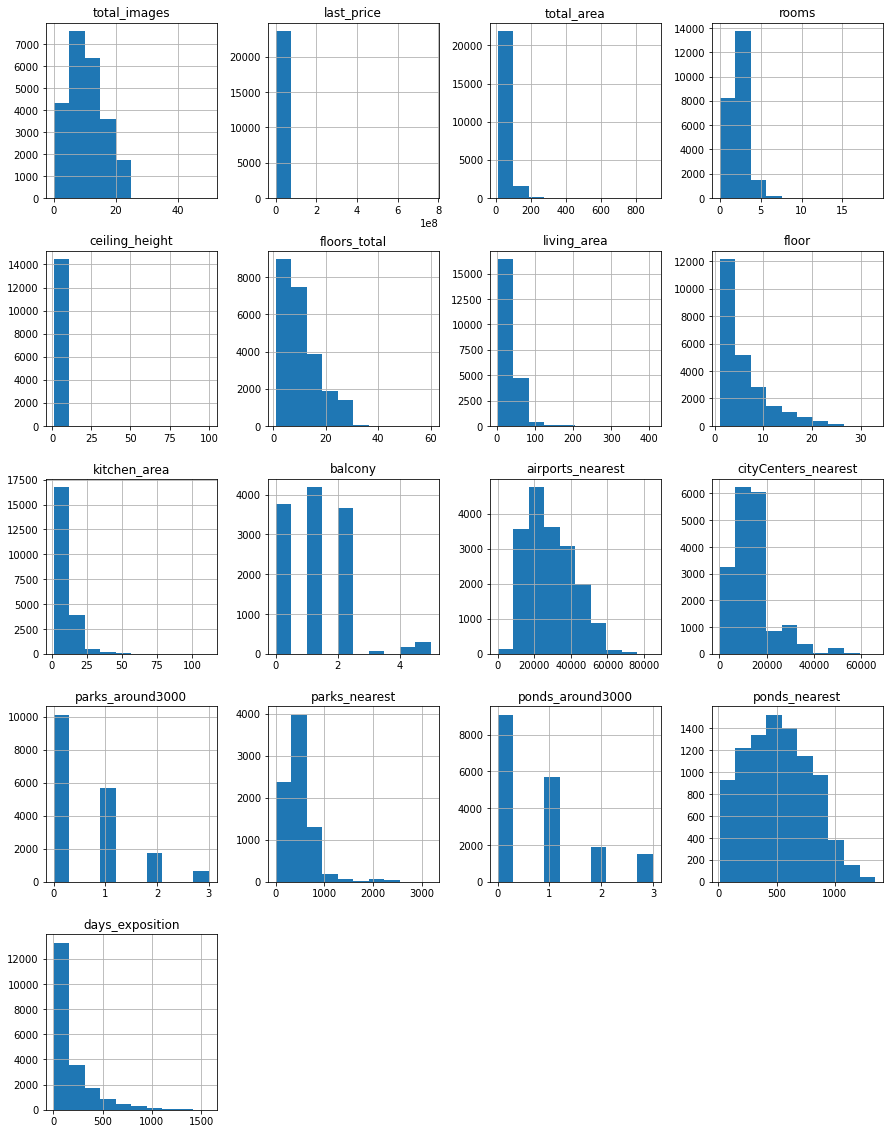

In [248]:
data.hist(figsize=(15, 20))

In [249]:
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Промежуточный вывод: После предварительного знакомства с данными обнаружены пропуски, значения с ошибочными форматами. Для полноценного проведения исследования необходимо предварительно обработать и подготовить данные.

# Шаг 2. Предобработка данных

In [250]:
# узнаем есть ли дубликаты строк?
print('Количесвто дубликатов строк',data.duplicated().sum())

Количесвто дубликатов строк 0


In [251]:
# узнаем в каких столбцах есть пропуски

data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

# Список столбцов с пропущенными значениями  
В исходных данных необходимо заполнить пропуски в столбцах датафрейма и в некоторых изменить тип данных.  
Для удобства сведем выявленные проблемы в задач в таблицу. Геоданные оставим без изменнеия, пропущенные названия столбцов удалим.

In [252]:
problems_list = [
    ('ceiling_height','оставить','заполнить'),
    ('floors_total','int','заполнить'),
    ('living_area','оставить','заполнить'),
    ('is_apartment','bool','заполнить'),
    ('kitchen_area','оставить','заполнить'),
    ('balcony','int','заполнить'),
    ('locality_name','оставить','удалить'),
    ('airports_nearest','оставить','оставить'),
    ('cityCenters_nearest','оставить','оставить'),
    ('parks_around3000','оставить','оставить'),
    ('parks_nearest','оставить','оставить'),
    ('ponds_around3000','оставить','оставить'),
    ('ponds_nearest','оставить','оставить'),
    ('days_exposition','data','заполнить')
]
tab=pd.DataFrame(problems_list,columns=['Название столбца ','Тип ',' Пропуски значений'])
print(tab)

      Название столбца       Тип   Пропуски значений
0        ceiling_height  оставить          заполнить
1          floors_total       int          заполнить
2           living_area  оставить          заполнить
3          is_apartment      bool          заполнить
4          kitchen_area  оставить          заполнить
5               balcony       int          заполнить
6         locality_name  оставить            удалить
7      airports_nearest  оставить           оставить
8   cityCenters_nearest  оставить           оставить
9      parks_around3000  оставить           оставить
10        parks_nearest  оставить           оставить
11     ponds_around3000  оставить           оставить
12        ponds_nearest  оставить           оставить
13      days_exposition      data          заполнить


# Заполнение пропусков в столбце ceiling_height

В столбце хранится количественное значение пропуски которого можно заполнить медианой или средней, так как высота потолков является количественной переменной.Данные в этом столбце не зависят от других значений.    
В нашем случае заполним пропуски медианой. 

In [253]:
data['ceiling_height'].isna().sum() # выведем количество пропусков в столбце до обработки

9195

In [254]:
#заполним медианным занчением пропуски
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

#проверим наличие пропусков 'ceiling_height'
data['ceiling_height'].isna().sum()

0

# Заполнение пропусков в столбце floors_total 

Так как это количественное значение, мы можем заполнить его медианой

In [255]:
data['floors_total'].isnull().sum()

86

In [256]:
#заполним медианным занчением пропуски
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median())
# проверим пропуски в floors_total.Если все успешно, пропуски будут равняться 0. 
data['floors_total'].isnull().sum()

0

In [257]:
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


# Заполнение пропусков в столбце living_area
Жилая площадь это количественная переменная в квадратных метрах. Заполним пропуски медианым значением.    
Возможная причина пропусков состоит в том что поле не является обязательным к заполнениию и Позователь пропустил умышленно или по ошибке. 
Заполним пропуски медианым значением.

In [258]:
#для наглядности работы с пропусками сведем данные по площади объекта в одну таблицу
data[['living_area','kitchen_area','total_area']].head(10) 

,living_area,kitchen_area,total_area
0,51.00,25.00,108.00
1,18.60,11.00,40.40
2,34.30,8.30,56.00
3,NaN,NaN,159.00
4,32.00,41.00,100.00
5,14.40,9.10,30.40
6,10.60,14.40,37.30
7,NaN,18.90,71.60
8,15.43,8.81,33.16
9,43.60,6.50,61.00


In [259]:
#выведем пропуски в столбце
data['living_area'].isna().sum()

1903

In [260]:
# заменим пропуски в столбце ceiling_height медианным процентом жилой площади('living_area') от общей площади ('total_area')
median_percent_la =(data['living_area'] / data['total_area']).median()

#в пропуски вставим общая площадь* медианную долю

data['living_area'] = data['living_area'].fillna(data['total_area'] * median_percent_la)

In [261]:
#проверка изменений
data[['living_area','kitchen_area','total_area']].head(10) 

,living_area,kitchen_area,total_area
0,51.000000,25.00,108.00
1,18.600000,11.00,40.40
2,34.300000,8.30,56.00
3,90.289724,NaN,159.00
4,32.000000,41.00,100.00
5,14.400000,9.10,30.40
6,10.600000,14.40,37.30
7,40.658769,18.90,71.60
8,15.430000,8.81,33.16
9,43.600000,6.50,61.00


In [262]:
# проверим, остались ли пропуски:
data['living_area'].isna().sum()

0

# Заполнение пропусков в столбце kitchen_area

В столбце хранится количественное значение которое возможно заполнить разностью жилой площади от общей площади объекта.   
Причины пропусков: поле не является обязательным к заполнениию и Позователь пропустил умышленно или по ошибке.
Пользователь мог не знать точную высоту потолков и предпочел пропустить заполнение.

In [263]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] - data['living_area'] )

#проверка изменений
data[['living_area','kitchen_area','total_area']].head(10) 

,living_area,kitchen_area,total_area
0,51.000000,25.000000,108.00
1,18.600000,11.000000,40.40
2,34.300000,8.300000,56.00
3,90.289724,68.710276,159.00
4,32.000000,41.000000,100.00
5,14.400000,9.100000,30.40
6,10.600000,14.400000,37.30
7,40.658769,18.900000,71.60
8,15.430000,8.810000,33.16
9,43.600000,6.500000,61.00


In [264]:
# проверим наличие изменений в kitchen_area. Если все успешно, пропуски будут равняться 0.
data['kitchen_area'].isnull().sum()

0

# Заполнение пропусков в столбце is_apartment
В столбце хранится булев тип значений. Нам необходимо заполнить значением False.  
Аналогично, возможная причина пропусков состоит в том что поле не является обязательным к заполнениию и Позователь пропустил умышленно или по ошибке.   
Также вполне возможно, что Пользователь не считает свой объект недвижимости аппартаментами.

In [265]:
data['is_apartment'] = data['is_apartment'].fillna(value=False)

# проверим наличие изменений в is_apartment. Если все успешно, пропуски будут равняться 0.
data['is_apartment'].isnull().sum() 

0

# Заполнение пропусков в столбце balcony

Там,где продавец не указал число балконов, заполним пропуски 0 
Продавец не указал число балконов так как балкона в его квартире могло не быть, либо поле не является обязательным для заполнения
Продавец мог не знать расстояние до парка, либо произошел сбой в системе

In [266]:
data.loc[data['balcony'].isna(), 'balcony'] = 0

# проверим наличие изменений в balcony. Если все успешно, пропуски будут равняться 0.
data['balcony'].isnull().sum()

0

# Заполнение пропусков в столбце locality_name  

Пропусков лишь 49. Можно их удалить, так как они не повляют на результаты 

In [267]:
data.dropna(subset = ['locality_name'], inplace=True)
data['locality_name'].isnull().sum()

0

# Заполнение пропусков в столбце days_exposition

Выдвинем предположение, что данных в стобце размещения объявления нет так как квартира ещё не продана. Для заполнения пропусков в столбце предлагаю определить самую дату самого позднего размещения объвления. Затем из нее с помощью логической индексанции вычисть даты объявлений и этими значениями заполнить пропуски в столбце days_exposition для этого сначала изменим формат в столбце дата публикации с object на datetime

## Изменение типа данных в столбце first_day_exposition

In [268]:
# приведем столбец first_day_exposition к необходимому формату даты чтобы можно было заполнить пропучки.
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],origin = 'unix' )

#проверим отображение
data['first_day_exposition'].head(5)

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

In [269]:
# выведем количество пропусков
data['days_exposition'].isna().sum()

3180

In [270]:
# найдем максимальную дату размещения объявления
data_last = data['first_day_exposition'].max()
#Выведем полученный результат
data_last

Timestamp('2019-05-03 00:00:00')

In [271]:
# заполним пропуски days_exposition разностью first_day_exposition и late_data
data.loc[data['days_exposition'].isna(),'days_exposition'] = \
(data_last - data.loc[data['days_exposition'].isna(),'first_day_exposition']).dt.days
#Наличиее пропусков после обработки
data['days_exposition'].isna().sum()

0

## Пропусуки в столбцах cityCenters_nearest, parks_nearest, ponds_nearest,parks_around3000,ponds_around3000

Так как в данных отутствуют точные адреса в данных полях нет возможности каким-либо образом точно категоризовать данные. Оставим пропуски.

# Изменение типа данных в столбце floors_total
Так как этаж в квартире возможен только в виде целого числа, заменим на значение int.

In [272]:
data['floors_total'] = data['floors_total'].astype('int')

#проверим результат
data['floors_total'].head(5)

0    16
1    11
2     5
3    14
4    14
Name: floors_total, dtype: int64

## Приведение названий населенных пунктов locality_name к единому списку

In [273]:
#выведем список уникальных названий населенных пунктов до обработки
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [274]:
# напишем функцию чтобы оставть только название населенных пунктов

def loc_name_correct(s):
    for i in range(len(s)):
        if s[i].isupper():
            return s[i : len(s)]
        
data['locality_name'] = data['locality_name'].apply(loc_name_correct)

In [275]:
#выведем список уникальных названий населенных пунктов после обработки
data['locality_name']

0        Санкт-Петербург
1                 Шушары
2        Санкт-Петербург
3        Санкт-Петербург
4        Санкт-Петербург
              ...       
23694    Санкт-Петербург
23695              Тосно
23696        Рождествено
23697    Санкт-Петербург
23698        Новый Учхоз
Name: locality_name, Length: 23650, dtype: object

# Найдите и устраните редкие и выбивающиеся значения (аномалии)

Необходимо исправить аномальные значения 25 м и 32 м. Поправим их на 2.5 и 3.2   
Перепишем данные в столбце ceiling_height

In [276]:
data.loc[data['ceiling_height']>20,'ceiling_height'] = data['ceiling_height'] / 10

#выведем резульатт
data['ceiling_height'].head(15)

0     2.70
1     2.65
2     2.65
3     2.65
4     3.03
5     2.65
6     2.65
7     2.65
8     2.65
9     2.50
10    2.67
11    2.65
12    2.65
13    2.56
14    2.65
Name: ceiling_height, dtype: float64

In [277]:
#так как потолки в квартире должны быть не менее 2.1м. удалим значения, не входящие в выборку:
data = data.query('ceiling_height > 2.1')

In [278]:
#проверим результат
data['ceiling_height'].value_counts().sort_values(ascending=True)

4.65       1
3.58       1
2.99       1
4.15       1
3.44       1
        ... 
3.00    1109
2.70    1580
2.60    1646
2.50    3522
2.65    9836
Name: ceiling_height, Length: 173, dtype: int64

# Шаг 3. Добавление в таблицу новых столбцов

## Цена одного квадратного метра

In [279]:
# Цена одного квадратного метра рассчитывается как стоимость объекта деленная на его площадь
data['price_for_metr'] = round(data['last_price'] / data['total_area'],2)

In [280]:
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_metr
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,57.0,120370.37
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.600000,1,False,...,2.0,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.300000,4,False,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,90.289724,9,False,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00


## Добавление столбца день публикации объявления

In [281]:
#Добавим столбец со днем публикации в таблицу

data['week_day'] = data['first_day_exposition'].dt.weekday

## Добавление столбца месяц объявления

In [282]:
#Добавим столбец с месяем публикации в таблицу
data['month'] = data['first_day_exposition'].dt.month

## Добавление столбца год публикации объявления

In [283]:
#Добавим столбец с годом публикации в таблицу
data['year'] = data['first_day_exposition'].dt.year

In [284]:
# Проверим появление новых столбцов
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_metr,week_day,month,year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,16028.0,1.0,482.0,2.0,755.0,57.0,120370.37,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.600000,1,False,...,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.300000,4,False,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,90.289724,9,False,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018


## Добавление столбца с типом этажа квартиры

In [285]:
#С помощью функции добавим столбец с типом этажа квартиры (значения — «первый», «последний», «другой»)

def floor_cat(row):
    total_floors = row['floors_total']
    floor = row['floor']
    if floor == total_floors:
        return 'Последний'
    elif floor == 1:
        return 'Первый'
    return 'Другой'


data['floor_category'] = data.apply(floor_cat, axis=1)
#Выведем для проверки 
data.tail(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_metr,week_day,month,year,floor_category
23684,20,21400000.0,145.00,2018-11-02,4,3.00,26,71.400000,17,False,...,0.0,NaN,0.0,NaN,182.0,147586.21,4,11,2018,Другой
23685,15,2490000.0,31.00,2019-01-24,1,2.50,5,17.300000,5,False,...,0.0,NaN,0.0,NaN,99.0,80322.58,3,1,2019,Последний
23686,8,3300000.0,31.00,2017-04-29,1,2.55,9,18.000000,6,False,...,1.0,140.0,1.0,317.0,193.0,106451.61,5,4,2017,Другой
23687,6,3200000.0,39.00,2017-12-16,1,2.65,9,20.000000,6,False,...,0.0,NaN,0.0,NaN,38.0,82051.28,5,12,2017,Другой
23688,19,9200000.0,101.00,2019-04-01,3,3.05,15,63.000000,12,False,...,0.0,NaN,0.0,NaN,23.0,91089.11,0,4,2019,Другой
23689,13,3550000.0,35.30,2018-02-28,1,2.86,15,16.300000,4,False,...,1.0,353.0,2.0,652.0,29.0,100566.57,2,2,2018,Другой
23690,3,5500000.0,52.00,2018-07-19,2,2.65,5,31.000000,2,False,...,1.0,300.0,0.0,NaN,15.0,105769.23,3,7,2018,Другой
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25,40.300000,7,False,...,0.0,NaN,1.0,806.0,519.0,129903.98,3,10,2016,Другой
23692,2,1350000.0,30.00,2017-07-07,1,2.65,5,17.500000,4,False,...,NaN,NaN,NaN,NaN,413.0,45000.00,4,7,2017,Другой
23693,9,4600000.0,62.40,2016-08-05,3,2.60,9,40.000000,8,False,...,1.0,352.0,1.0,675.0,239.0,73717.95,4,8,2016,Другой


## Добавление столбца с расстоянием до центра города в километрах

In [286]:
#Добавим столбец с округленными значениями расстояния до центра города в километрах
data['close_to_cityCenter'] = round(data['cityCenters_nearest'] / 1000)

In [287]:
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_metr,week_day,month,year,floor_category,close_to_cityCenter
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,482.0,2.0,755.0,57.0,120370.37,3,3,2019,Другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.600000,1,False,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,Первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.300000,4,False,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,Другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,90.289724,9,False,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,Другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,Другой,8.0


# Шаг 4. Исследовательский анализ данных

### Изучение общей площади

<AxesSubplot:>

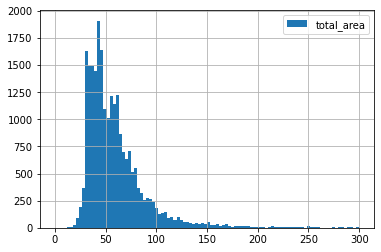

In [288]:
#Построим гисторгамму по столбцу

data['total_area'].hist(bins=100, range=(0,300), legend=True)

Вывод:
В основном площадь квартир датасета находится в промежутке от 30 до 70 квадратных метров

### Изучение жилой площади

<AxesSubplot:>

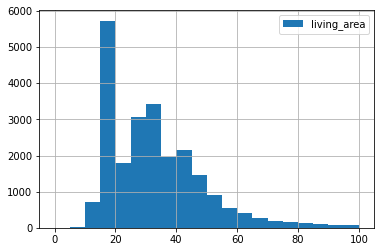

In [289]:
#Построим график
data['living_area'].hist(bins=20, range=(0,100), legend=True)

Вывод:
    Четко прослеживаются 2 пика. Основная жилая площадь квартир находится в промежутках 15-20 и 25-35 кв м. 

## Изучим площадь кухни

<AxesSubplot:>

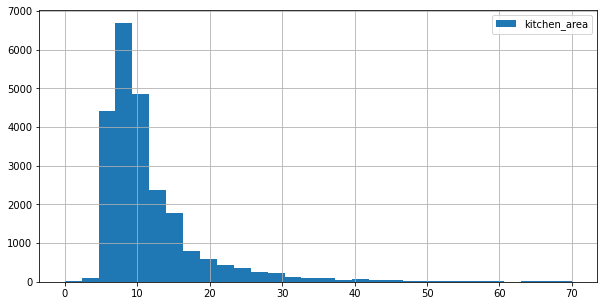

In [290]:
#Построим график
data['kitchen_area'].hist(figsize = (10,5), bins=30, range=(0,70), legend=True)

Вывод:
    В основном площадь кухни находитмся в промежутке 5-15 м2

## Цена объекта

<AxesSubplot:>

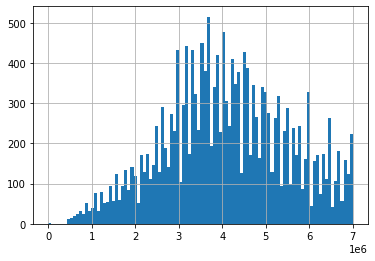

In [291]:
#Построим график

data['last_price'].hist(bins=100, range=(0, 7000000))

Вывод: большая часть цен на квартиры находтся в пределах 3-5 млн

## Количество комнат

array([[<AxesSubplot:title={'center':'rooms'}>]], dtype=object)

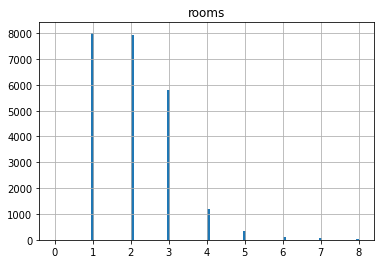

In [292]:
#сделаем срез данных : уберем квартиры -студии и помещения без указания комнат и построим график

data.query('studio == False & rooms != 0').hist('rooms', bins=100, range=(0,8))

Вывод:
    в основном в данных представленны 1-3 комнатные квартиры

## Высота потолков

<AxesSubplot:>

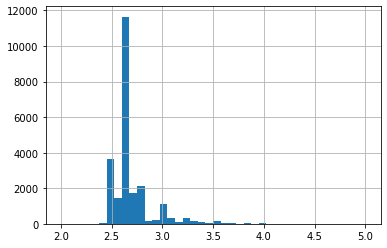

In [293]:
data['ceiling_height'].hist(bins=40, range=(2, 5))

Вывод:
    Большая часть кваритир в данных с потолками 2.65 м

## Этаж квартиры

<AxesSubplot:>

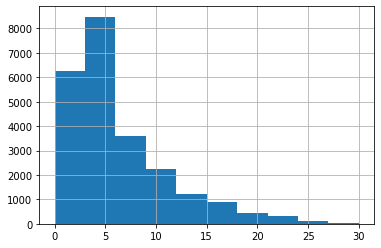

In [294]:
data['floor'].hist(bins=10, range=(0, 30))

Вывод: в данных представленны в основном квартиры с 1 по 7 этаж

## Тип этажа квартиры («первый», «последний», «другой»)

<AxesSubplot:>

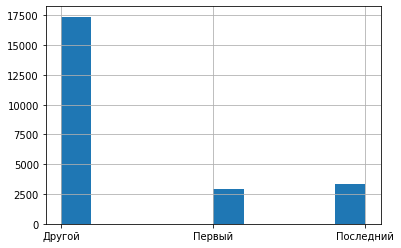

In [295]:
data['floor_category'].hist(bins=10)

Вывод:
В основном в данных квартиры из категории Другой

## Общее количество этажей в доме

<AxesSubplot:>

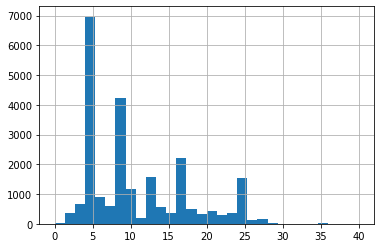

In [296]:
data['floors_total'].hist(bins=30,range=(0, 40))

Вывод: в данных квартиры в основном с 4 по 6 этаж. Квартиры в основной массе в многоэтажных задниях до 25 этажей. В многоэтажных зданиях (свыше 25 этажей) количество квартир существенно меньше.

## Расстояние до центра города в метрах

<AxesSubplot:>

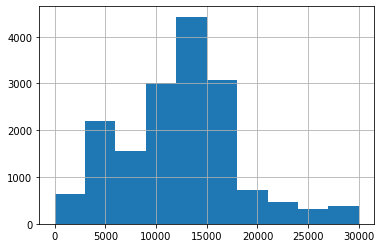

In [297]:
data['cityCenters_nearest'].hist(bins=10,range=(0, 30000))

Вывод: В данных в основном объекты с расстоянием до центра города от 10000 до 18000 метров. Можно предположить, что объекты приемущественно в спальных районах или пригородах

## Расстояние до ближайшего аэропорта в метрах

<AxesSubplot:>

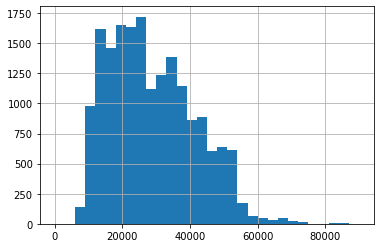

In [298]:
data['airports_nearest'].hist(bins=30,range=(0, 90000))

Вывод: Большая часть квартир датасета находится в промежутке от 5000 до 35000 км до аэропорта, что подтверждает преобладание данных по квартирам в пригороде / окраинах города.

## Расстояние до ближайшего парка в метрах

<AxesSubplot:>

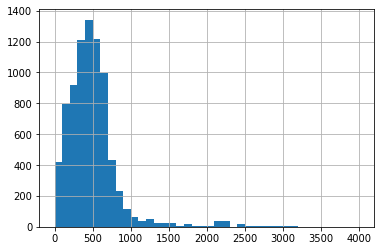

In [299]:
data['parks_nearest'].hist(bins=40,range=(0, 4000))

Вывод: большая часть квартир датасета находится в непосредственной близости от парков (в радиусе 1000 метров).

## День и месяц публикации объявления

(0.0, 7.0)

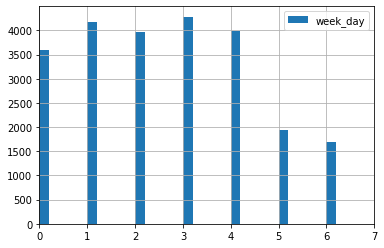

In [300]:
data['week_day'].hist(bins=100,range=(0, 20), legend=True)
plt.xlim(0, 7)

In [301]:
data['week_day'].value_counts().sort_values(ascending=False)

3    4282
1    4172
4    3992
2    3964
0    3604
5    1933
6    1689
Name: week_day, dtype: int64

(0.0, 12.0)

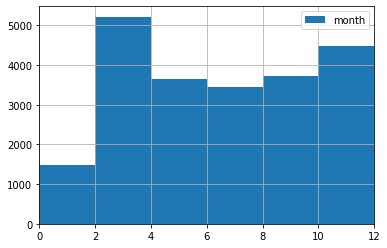

In [302]:
data['month'].hist(bins=10,range=(0, 20), legend=True)
plt.xlim(0, 12)

In [303]:
data['month'].value_counts().sort_values(ascending=False)

2     2638
3     2580
4     2373
11    2367
10    2120
9     1979
6     1754
8     1741
7     1688
12    1636
1     1491
5     1269
Name: month, dtype: int64

Вывод: Объявления публиковались в основном в промежутке со 2 по 4 месяц (с февраля по апрель) с 1 по 4 день (со вторника по пятницу).

## Изучите, как быстро продавались квартиры 

In [304]:
#Изучим структуру данных о продажах, выведем среднее и медиану
data['days_exposition'].describe()

count    23636.000000
mean       185.758335
std        233.506829
min          0.000000
25%         43.000000
50%         94.000000
75%        237.000000
max       1618.000000
Name: days_exposition, dtype: float64

Выделяется  разница значений средней(mean) и медианы (50,6%). Средняя больше медианы в два раза и это говорит о том, что 
в распределении имеются большие значения, влияющие на значение средней, но не оказывающее влияния на медиану. 

Значение продаж 0 дней выглядит нереалистично. Обычно квартиры на рынке продаются достаточно долго так как это связано с большим количеством бюрократии.

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

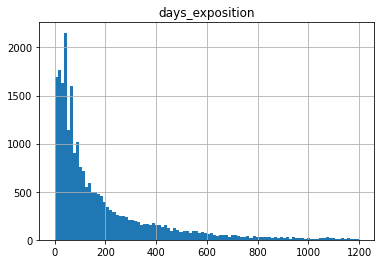

In [305]:
# построим гистограмму по срезу, который не включает значение продаж 0 дней.

data.query('days_exposition != 0').hist('days_exposition', bins=100, range=(0,1200))

<AxesSubplot:>

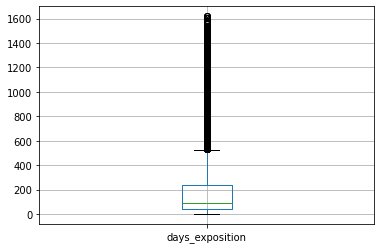

In [306]:
# подробнее посмотрим на диаграме размаха
data.query('days_exposition != 0').boxplot('days_exposition')


Большая часть нормальных значений находится в диапазоне до 300 дней, что говорит о том, что квартиры быстрее всего продаются от 6 до 10 месяцев. 
За пределами 550 дней находятся выбросы данных.

In [307]:
round(((data.query('days_exposition > 550')['days_exposition'].count()) / len(data['days_exposition']) )*100, 1)

7.6

Необычайно долгими являются продажи квартир более 550 дней. Это 7,6 % от общего количества данных (23636 записей). 

# Какие факторы больше всего влияют на общую (полную) стоимость объекта?

In [308]:
#Ознакомимся с данными о ценах подробнее
data.last_price.describe()

count    2.363600e+04
mean     6.542963e+06
std      1.089916e+07
min      1.219000e+04
25%      3.403750e+06
50%      4.650000e+06
75%      6.799250e+06
max      7.630000e+08
Name: last_price, dtype: float64

<AxesSubplot:>

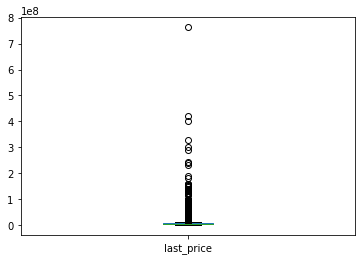

In [309]:
#Построим график размаха для цены и посмотрим разброс данных
data.last_price.plot.box()

График неинформативен и для объективного расчета данные необходимо предваритльно подготовить для работы. Поэтому уберем выбросы выше 1,5 верхнего межквартильного размаха

In [310]:
# запишем квантили в переменные quantile1 и quantile3 соответственно:
quantile1 = data.last_price.quantile(0.25)
quantile3 = data.last_price.quantile(0.75)
# Рассчитаем межквартильный размах и запишем в переменную q
q= quantile3 - quantile1

#выведем полученный межквартильный размах на экран
q

3395500.0

In [311]:
# исключим данные выше 1,5 межквартильного размаха и запишем результат в новую переменную
data_correct = data.query('last_price <= @quantile3 + 1.5*@q')

#выведем для проверки первые 5 строк
data_correct.head()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_metr,week_day,month,year,floor_category,close_to_cityCenter
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,Первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,Другой,14.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,Другой,8.0
5,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.4,5,False,...,NaN,NaN,NaN,55.0,95065.79,0,9,2018,Другой,NaN
6,6,3700000.0,37.3,2017-11-02,1,2.65,26,10.6,6,False,...,NaN,0.0,NaN,155.0,99195.71,3,11,2017,Другой,19.0


<AxesSubplot:>

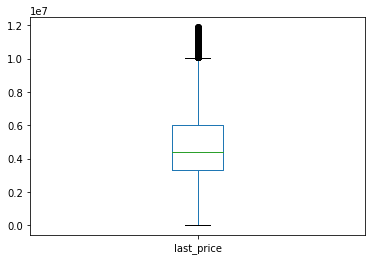

In [312]:
#Построим обновленный график размаха для цены и вновь посмотрим разброс данных
data_correct.last_price.plot.box()

## Проанализируем, зависит ли цена от общей площади

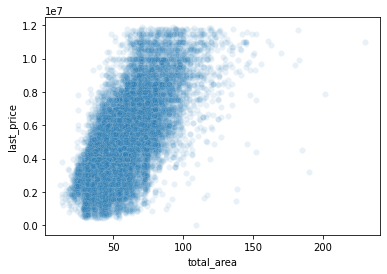

In [313]:
sns.scatterplot(data=data_correct, x='total_area', y='last_price', alpha = 0.1)
plt.show()


По графику четко видно, что квартиры с большей площадью стоят дороже

## Проанализируем, зависит ли цена от жилой площади на диаграмме рассеивания

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

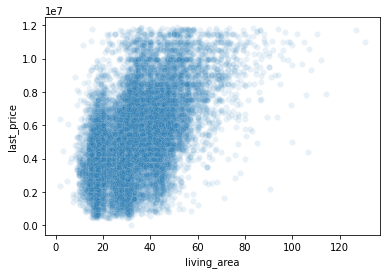

In [314]:
sns.scatterplot(data=data_correct, x='living_area', y='last_price', alpha=0.1)

Видим, что чем больше площадь квартиры, тем выше ее цена. Это вполне логично.

## Проанализируем, зависит ли цена от жилой площади

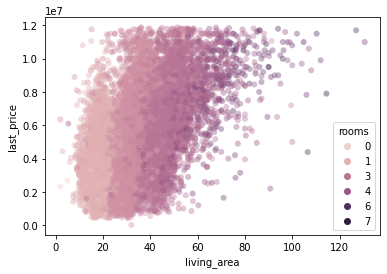

In [315]:
sns.scatterplot(data=data_correct, x='living_area', y='last_price', hue='rooms', alpha=0.4, linewidth=0)
plt.show()

На графике видно, что с увеличением жилой площади возрастает и цена.

## Проанализируем, зависит ли цена от количества комнат

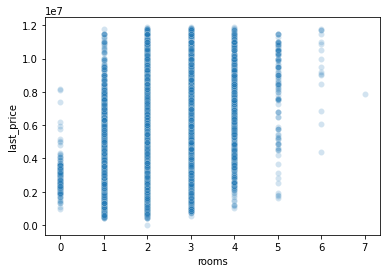

In [316]:
sns.scatterplot(data=data_correct, x='rooms', y='last_price', alpha=0.2)
plt.show()

Видим, что при большем количестве комнат цена на объект выше

## Проанализируем, зависит ли цена от этажа, на котором расположена квартира (первый, последний, другой)

<AxesSubplot:xlabel='last_price', ylabel='floor_category'>

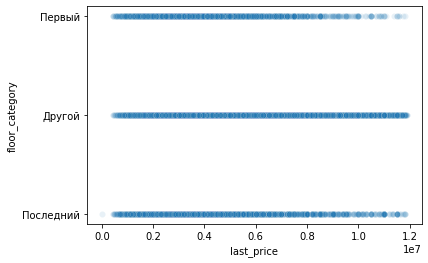

In [317]:
sns.scatterplot(data=data_correct, x='last_price', y='floor_category', alpha = 0.1)

Видим, что квартиры из категории Другой стоят дороже а дешевле всего квартиры на первом этаже.

## Проанализируем, зависит ли цена от даты размещения (день недели, месяц, год)

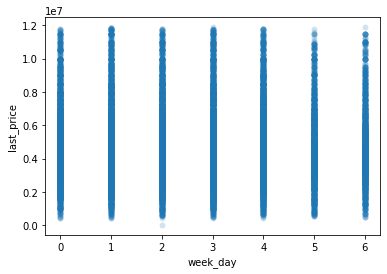

In [318]:
sns.scatterplot(data=data_correct, x='week_day', y='last_price', alpha=0.2, linewidth=0)
plt.show()

Видим, что с понедельника по пятницу цены выше, чем в субботу и воскресенье

<AxesSubplot:xlabel='month'>

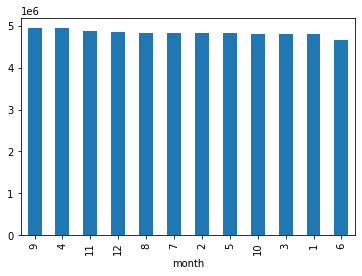

In [319]:
(data_correct
    .pivot_table(index='month', values='last_price')
    .sort_values('last_price',ascending=False)
    .plot(kind='bar', legend=False))

По графику видно, что цены на квартиры влияет сезонность. Дешевле всего квартиры продаются в июне и январе.

<AxesSubplot:xlabel='year'>

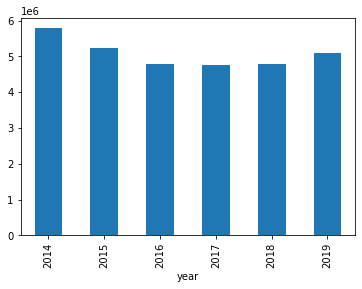

In [320]:
(data_correct
    .pivot_table(index='year', values='last_price')
    .plot(kind='bar', legend = False))

In [321]:
(data_correct
    .pivot_table(index='year', values='last_price',aggfunc='mean'))

,last_price
year,
2014,5.782435e+06
2015,5.244956e+06
2016,4.790779e+06
2017,4.768778e+06
2018,4.775747e+06
2019,5.097405e+06


Судя по графику сделаем вывод о том, что c 2014 по 2017 годы цена снижается,но с 2018 по 2019 наблюдется постепенный рост цен.

# Расчет средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений и выделение населённых пунктов с самой высокой и низкой стоимостью квадратного метра.

Для расчета средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений соберем данные в сводную таблицу


In [322]:
(data_correct
    .pivot_table(index='locality_name', values='price_for_metr', aggfunc=('mean', 'count'))
    .sort_values(by='count', ascending=False)
    .head(10))

,count,mean
locality_name,,
Санкт-Петербург,13733,105421.819482
Мурино,590,86087.512017
Кудрово,469,95152.957527
Шушары,440,78677.364318
Всеволожск,396,67275.625859
Пушкин,338,100290.598698
Колпино,336,75185.478244
Парголово,327,90175.913089
Гатчина,305,68421.902525


В сводную таблицу также выделеним населённые пункты с самой высокой стоимостью квадратного метра

In [323]:
(data_correct
 .pivot_table(index='locality_name', values='last_price')
 .sort_values(by='last_price', ascending=False)
 .head(10))

,last_price
locality_name,
Хязельки,1.100000e+07
Репино,6.889139e+06
Сестрорецк,5.707094e+06
Санкт-Петербург,5.663542e+06
Пушкин,5.334385e+06
Зеленогорск,5.032164e+06
Заневка,4.781500e+06
Мистолово,4.770114e+06
Глинка,4.750000e+06


В сводную таблицу также выделеним населённые пункты с самой низкой стоимостью квадратного метра

In [324]:
(data_correct
.pivot_table(index='locality_name', values='last_price')
.sort_values(by='last_price', ascending=True)
.head(10))

,last_price
locality_name,
Вахнова Кара,450000.0
Старополье,460000.0
Бор,500000.0
Чудской Бор,500000.0
Совхозный,517500.0
Свирь,575000.0
Выскатка,585000.0
Ям-Тесово,625000.0
Фалилеево,650000.0


## Выделение квартир в Санкт-Петербурге и вычисление средней цены каждого километра c описанием того как стоимость объектов зависит от расстояния до центра города

In [325]:
#Выделим квартиры в Санкт-Петербурге в отдельную переменную c указанием средней цены каждого километра

cityCentere_close_km = (data_correct
                     .query('locality_name == "Санкт-Петербург"')
                     .pivot_table(index='close_to_cityCenter', values='last_price', aggfunc=('mean')))

#проверим результат вычислений
cityCentere_close_km

,last_price
close_to_cityCenter,
0.0,8.398000e+06
1.0,8.145277e+06
2.0,7.970519e+06
3.0,7.346575e+06
4.0,7.606618e+06
5.0,7.661225e+06
6.0,7.108234e+06
7.0,6.635321e+06
8.0,6.605968e+06


Судя по таблице, квартиры в центре стоят существенно дороже остальных в городе и с удаленностью от центра постепенно дешевеют

### Общий вывод

При подготовке данных было выявлено, что пропусков и ошибок возможно было избежать. Для того, чтобы в дальнейшем сразу иметь качественные исходные данные предлагается сделать некоторые столбцы системы обязательными к заполнению. 
Также стоит проверить работу системы в части передачи данных о закрытии заявок.  

Cогласно проведенному исследовательскому анализу подготовленных данных было выявлено, цена на квартиру зависит от множества факторов самым важным из которых являетcя площадь квартиры и , соответственно, чем ближе квартира к центру находится квартира, тем выше цена за квадратный метр.